In [2]:
# Install pandas if not already installed
%pip install pandas

# Import required libraries
import pandas as pd
# Load the trader historical data
trader_data = pd.read_csv('historical_data.csv')

# Load the fear and greed index data
sentiment_data = pd.read_csv('fear_greed_index.csv')

# Quick check of the first few rows
print("Trader Data Sample:")
print(trader_data.head())

print("\nSentiment Data Sample:")
print(sentiment_data.head())


  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl (12.7 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [pytz]
   ---------------------------------------- 0/4 [p

In [3]:
# Check the trader data structure
print(trader_data.info())
print(trader_data.columns)

# Check the sentiment data structure
print(sentiment_data.info())
print(sentiment_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
# Safely convert Trader Timestamp to datetime (invalid formats will become NaT)
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], errors='coerce')

# Check if there are invalid dates
print("Number of invalid dates:", trader_data['Timestamp IST'].isna().sum())


Number of invalid dates: 131999


In [6]:
# Display some invalid timestamps
invalid_dates = trader_data[trader_data['Timestamp IST'].isna()]
print(invalid_dates['Timestamp IST'].head(20))


224   NaT
225   NaT
226   NaT
227   NaT
228   NaT
229   NaT
230   NaT
231   NaT
232   NaT
233   NaT
234   NaT
235   NaT
236   NaT
237   NaT
238   NaT
239   NaT
240   NaT
241   NaT
242   NaT
243   NaT
Name: Timestamp IST, dtype: datetime64[ns]


In [7]:
# Show the raw, unconverted timestamp strings
print(trader_data['Timestamp IST'].head(20))


0    2024-02-12 22:50:00
1    2024-02-12 22:50:00
2    2024-02-12 22:50:00
3    2024-02-12 22:50:00
4    2024-02-12 22:50:00
5    2024-02-12 22:50:00
6    2024-02-12 22:50:00
7    2024-02-12 22:50:00
8    2024-02-12 22:50:00
9    2024-02-12 22:50:00
10   2024-02-12 22:50:00
11   2024-02-12 22:51:00
12   2024-02-12 22:51:00
13   2024-02-12 22:51:00
14   2024-02-12 22:51:00
15   2024-02-12 22:54:00
16   2024-02-12 22:54:00
17   2024-02-12 22:54:00
18   2024-02-12 22:54:00
19   2024-02-12 22:54:00
Name: Timestamp IST, dtype: datetime64[ns]


In [8]:
# Drop rows with invalid (NaT) timestamps
trader_data_clean = trader_data.dropna(subset=['Timestamp IST'])

print(f"Original rows: {len(trader_data)}")
print(f"Cleaned rows: {len(trader_data_clean)}")


Original rows: 211224
Cleaned rows: 79225


In [9]:
# Extract date only for merging
trader_data_clean['Trade Date'] = trader_data_clean['Timestamp IST'].dt.date
trader_data_clean['Trade Date'] = pd.to_datetime(trader_data_clean['Trade Date'])


C:\Users\Fathimath Sareena\AppData\Local\Temp\ipykernel_15080\2218377928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_data_clean['Trade Date'] = trader_data_clean['Timestamp IST'].dt.date
C:\Users\Fathimath Sareena\AppData\Local\Temp\ipykernel_15080\2218377928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trader_data_clean['Trade Date'] = pd.to_datetime(trader_data_clean['Trade Date'])


In [10]:
# Convert sentiment date
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])


In [11]:
# Merge cleaned trader data with sentiment data
merged_data = pd.merge(trader_data_clean, sentiment_data, left_on='Trade Date', right_on='date', how='left')

# Check the merged result
print(merged_data.head())

# Check the sentiment distribution
print(merged_data['classification'].value_counts())


                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Order ID  Crossed       Fee      Trade ID  \
0         0.0  ...  5201

In [12]:
# Average Closed PnL (profit) per sentiment
avg_pnl_per_sentiment = merged_data.groupby('classification')['Closed PnL'].mean()
print("Average PnL per Sentiment:\n", avg_pnl_per_sentiment)


Average PnL per Sentiment:
 classification
Extreme Fear       1.891632
Extreme Greed    205.816345
Fear             128.287950
Greed             53.988003
Neutral           27.088803
Name: Closed PnL, dtype: float64


In [13]:
# Total number of trades per sentiment
trade_count_per_sentiment = merged_data['classification'].value_counts()
print("\nTrade Counts per Sentiment:\n", trade_count_per_sentiment)



Trade Counts per Sentiment:
 classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl (2.7 MB)
U

C:\Users\Fathimath Sareena\AppData\Local\Temp\ipykernel_15080\1567727537.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl_per_sentiment.index, y=avg_pnl_per_sentiment.values, palette='viridis')


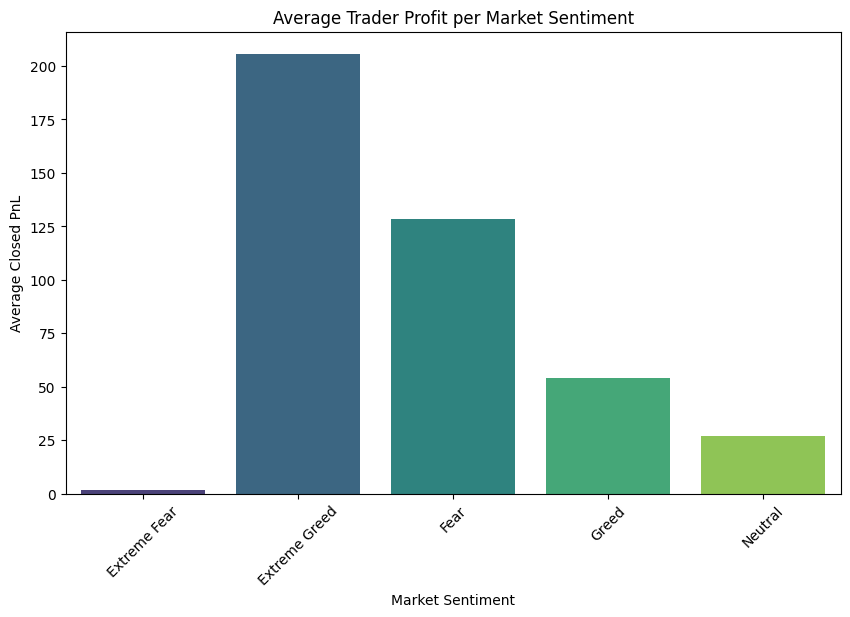

In [14]:
%pip install matplotlib seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=avg_pnl_per_sentiment.index, y=avg_pnl_per_sentiment.values, palette='viridis')
plt.title('Average Trader Profit per Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45)
plt.show()


C:\Users\Fathimath Sareena\AppData\Local\Temp\ipykernel_15080\318205015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trade_count_per_sentiment.index, y=trade_count_per_sentiment.values, palette='coolwarm')


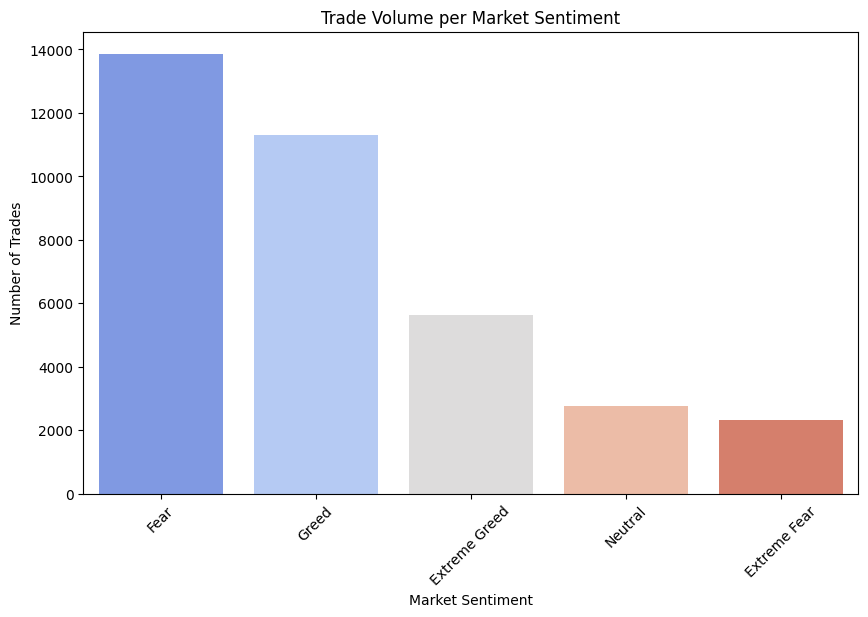

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=trade_count_per_sentiment.index, y=trade_count_per_sentiment.values, palette='coolwarm')
plt.title('Trade Volume per Market Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.xticks(rotation=45)
plt.show()
